Bedtools intersect: -u Write original A entry once if any overlaps found in B. In other words, just report the fact at least one overlap was found in B. Restricted by -f and -r.


bash:


#bedtools intersect -a predictions -b ../data/promoters.bed -u > promoter_regions.tsv


#bedtools intersect -a predictions -b ../data/promoters.bed -v > non_promoter_regions.tsv

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

In [5]:
print(px.colors.qualitative.Dark24)

['#2E91E5', '#E15F99', '#1CA71C', '#FB0D0D', '#DA16FF', '#222A2A', '#B68100', '#750D86', '#EB663B', '#511CFB', '#00A08B', '#FB00D1', '#FC0080', '#B2828D', '#6C7C32', '#778AAE', '#862A16', '#A777F1', '#620042', '#1616A7', '#DA60CA', '#6C4516', '#0D2A63', '#AF0038']


In [2]:
promoter = pd.read_csv('promoter_regions.tsv', sep='\t', header = None)
promoter

,0,1,2,3
0,chr12,65727,65928,0.431220
1,chr12,65928,66129,0.403407
2,chr12,66531,66732,1.892710
3,chr12,66732,66933,1.661589
4,chr12,76179,76380,0.601075
...,...,...,...,...
13974,chr22,50756319,50756520,0.249102
13975,chr22,50756520,50756721,0.454063
13976,chr22,50756922,50757123,0.334950
13977,chr22,50783655,50783856,2.271288


In [3]:
promoter_target = promoter.iloc[:,-1:]

In [4]:
promoter_target

,3
0,0.431220
1,0.403407
2,1.892710
3,1.661589
4,0.601075
...,...
13974,0.249102
13975,0.454063
13976,0.334950
13977,2.271288


In [5]:
no_promoter = pd.read_csv('non_promoter_regions.tsv', sep='\t', header = None)
no_promoter_target = no_promoter.iloc[:,-1:]

In [6]:
no_promoter

,0,1,2,3
0,chr12,10050,10251,0.223625
1,chr12,10251,10452,0.282865
2,chr12,10452,10653,0.556270
3,chr12,11055,11256,2.426058
4,chr12,11658,11859,0.217632
...,...,...,...,...
800044,chr22,50804760,50804961,0.259439
800045,chr22,50806770,50806971,1.273128
800046,chr22,50806971,50807172,1.758212
800047,chr22,50807775,50807976,0.518197


In [7]:
no_promoter_target = no_promoter_target[1:5000]

In [8]:
no_promoter_target

,3
1,0.282865
2,0.556270
3,2.426058
4,0.217632
5,0.546800
...,...
4995,0.329678
4996,0.342366
4997,0.277553
4998,0.327690


In [8]:
promoter_target.median()

3    0.463034
dtype: float64

In [9]:
no_promoter_target.median()

3    0.299272
dtype: float64

In [9]:
promoter_target["label"] = "promoter"

/scratch/59506091/ipykernel_34941/2628036612.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  promoter_target["label"] = "promoter"


In [10]:
no_promoter_target["label"] = "no_promoter"

In [11]:
data = pd.concat([promoter_target, no_promoter_target],ignore_index=True)

In [12]:
data

,3,label
0,0.431220,promoter
1,0.403407,promoter
2,1.892710,promoter
3,1.661589,promoter
4,0.601075,promoter
...,...,...
18973,0.329678,no_promoter
18974,0.342366,no_promoter
18975,0.277553,no_promoter
18976,0.327690,no_promoter


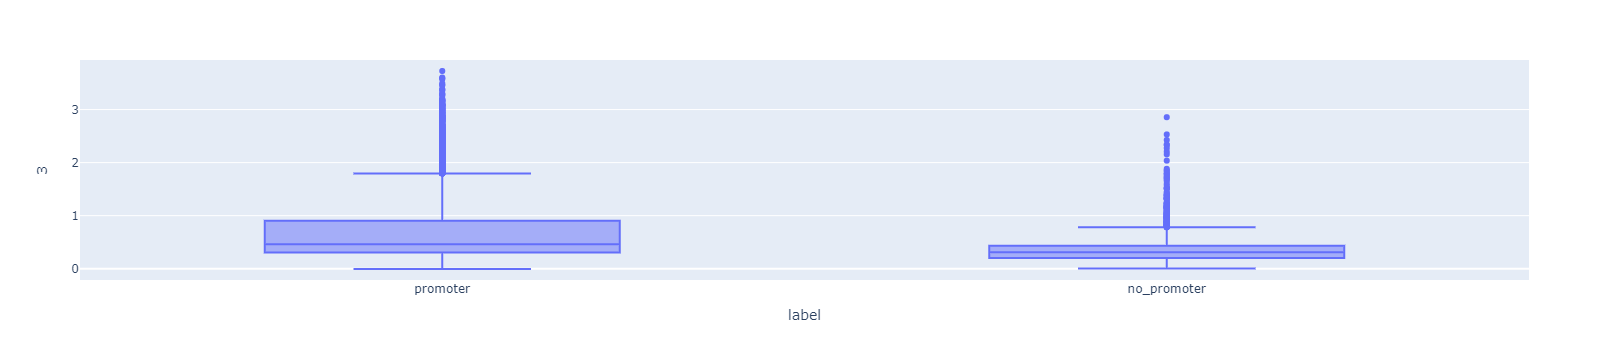

In [14]:
import plotly.express as px
#df = px.data.tips()
fig = px.box(data, x="label", y=3)
fig.show()

In [15]:
fig.write_image("fig1.png")